In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [34]:
def showimg(img):
	plt.imshow(img, cmap="gray"), plt.xticks([]), plt.yticks([])
	plt.show()

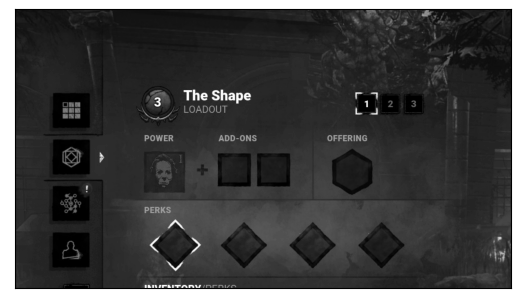

In [35]:
screen = cv2.cvtColor(cv2.imread("screen2.png"), cv2.COLOR_BGR2GRAY)
h,w = screen.shape
screen = screen[:h//2,:w//2]
showimg(screen)

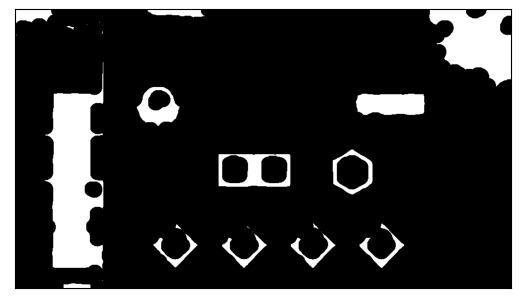

In [36]:
_,black = cv2.threshold(screen, 15, 255, cv2.THRESH_BINARY_INV)
black = cv2.morphologyEx(black, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30,30)))
showimg(black)

In [37]:
_,_,stats,_ = cv2.connectedComponentsWithStats(black, connectivity=8, ltype=cv2.CV_16U)

In [38]:
perkwidth = 88 # from calibration
loadoutPerks = [comp for comp in stats if 300 < comp[cv2.CC_STAT_AREA] < 2000 and abs(comp[cv2.CC_STAT_WIDTH] - perkwidth) < 10]
medianbottom = np.median([(comp[cv2.CC_STAT_TOP]+comp[cv2.CC_STAT_HEIGHT]) for comp in loadoutPerks])
loadoutPerks = [perk for perk in loadoutPerks if abs((perk[cv2.CC_STAT_TOP]+perk[cv2.CC_STAT_HEIGHT]) - medianbottom) < 10]
loadoutPerks

[array([ 667,  415,   86,   86, 1332], dtype=int32),
 array([ 268,  435,   85,   65, 1070], dtype=int32),
 array([ 401,  435,   86,   66, 1125], dtype=int32),
 array([ 534,  434,   86,   67, 1084], dtype=int32)]